<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/content/Sample - Superstore.xls",sheet_name=None)
df

{'Orders':       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
 0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
 1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
 2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
 3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
 4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
 ...      ...             ...        ...        ...             ...   
 9989    9990  CA-2015-110422 2015-01-21 2015-01-23    Second Class   
 9990    9991  CA-2018-121258 2018-02-26 2018-03-03  Standard Class   
 9991    9992  CA-2018-121258 2018-02-26 2018-03-03  Standard Class   
 9992    9993  CA-2018-121258 2018-02-26 2018-03-03  Standard Class   
 9993    9994  CA-2018-119914 2018-05-04 2018-05-09    Second Class   
 
      Customer ID     Customer Name    Segment        Country             City  \
 0       CG-12520       Claire Gute   Consumer  United

In [ ]:
xlsheet = pd.ExcelFile('/content/Sample - Superstore.xls')
xlsheet.sheet_names

['Orders', 'People', 'Returns']

In [3]:
dataset1  = df['Orders']
dataset2 = df['People']
dataset3 = df['Returns']

In [ ]:
print(dataset1.columns,dataset1.shape)
print(dataset2.columns,dataset2.shape)
print(dataset3.columns,dataset3.shape)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object') (9994, 21)
Index(['Person', 'Region'], dtype='object') (4, 2)
Index(['Returned', 'Order ID'], dtype='object') (800, 2)


In [ ]:
print(dataset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes
None


In [ ]:
print(dataset3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  800 non-null    object
 1   Order ID  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB
None


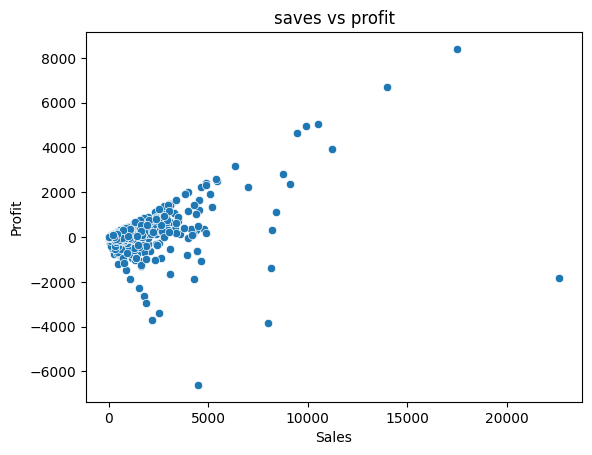

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(dataset1, x='Sales', y='Profit')
plt.title('saves vs profit')
plt.show()

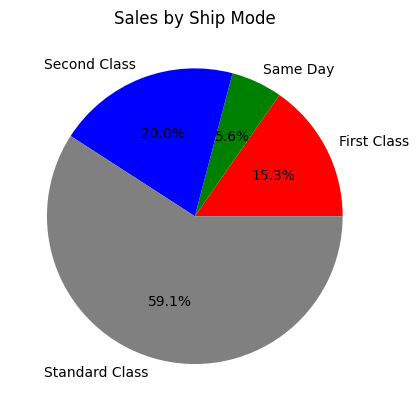

In [8]:
array = ['red','green','blue','grey']
# Calculate the sum of sales for each ship mode
ship_mode_sales = dataset1.groupby('Ship Mode')['Sales'].sum()
# Create the pie chart
plt.pie(ship_mode_sales, labels=ship_mode_sales.index, autopct='%1.1f%%', colors=array);
plt.title('Sales by Ship Mode')
plt.show()

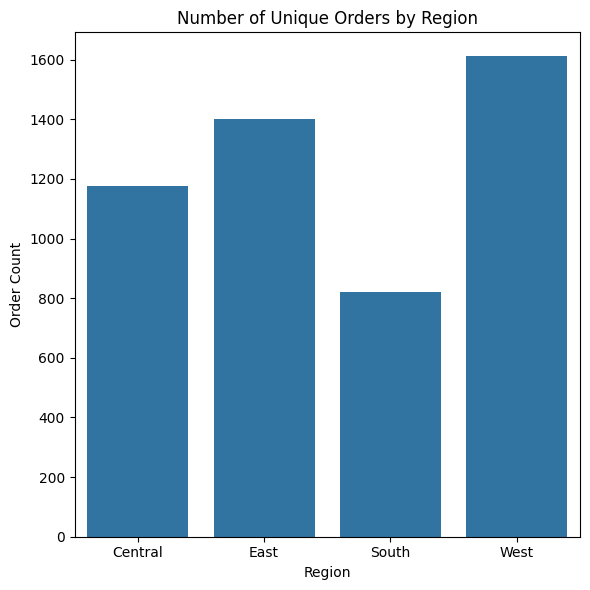

In [11]:
order_counts = df['Orders'].groupby('Region')['Order ID'].nunique().reset_index(name='Order Count')
plt.figure(figsize=(6, 6))
sns.barplot(data=order_counts, x='Region', y='Order Count')

plt.title('Number of Unique Orders by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

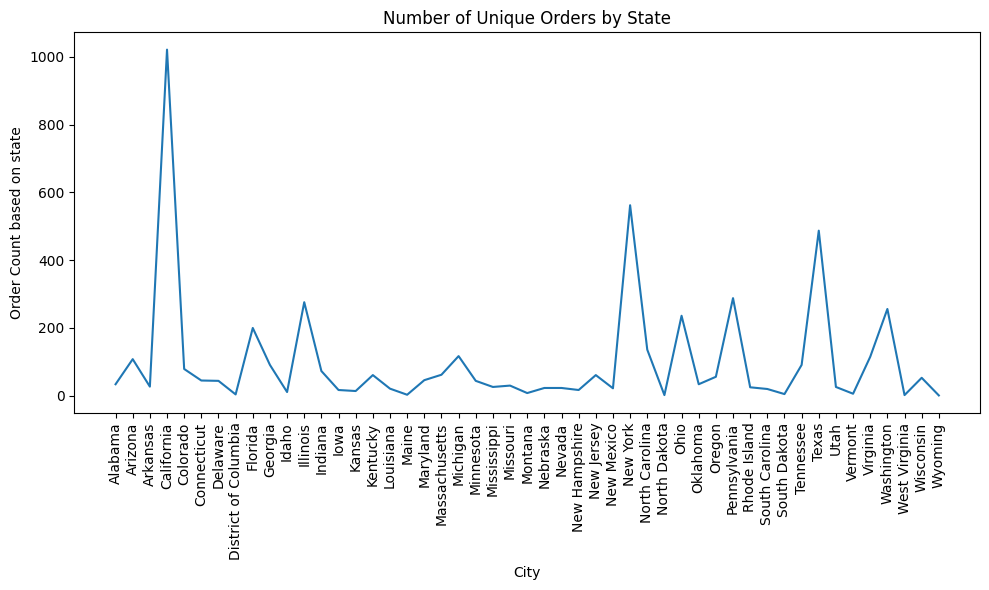

In [19]:
order_counts1 = df['Orders'].groupby('State')['Order ID'].nunique().reset_index(name='Order Count State')
plt.figure(figsize=(10, 6))
plt.plot(order_counts1['State'], order_counts1['Order Count State'])

plt.title('Number of Unique Orders by State')
plt.xlabel('City')
plt.ylabel('Order Count based on state')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1951641408.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


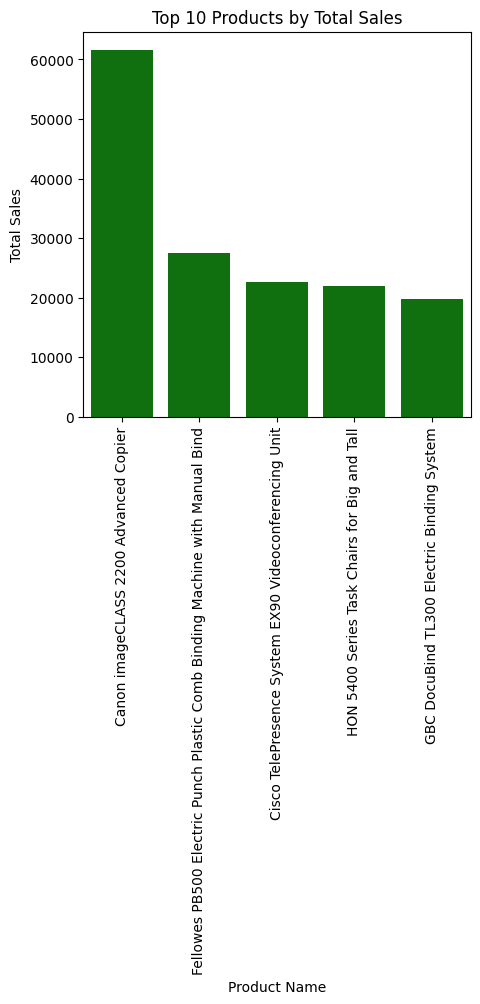

In [25]:
product_sales = dataset1.groupby('Product Name')['Sales'].sum().reset_index()
top_products = product_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(data=top_products.head(5), x='Product Name', y='Sales', color='green')

plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

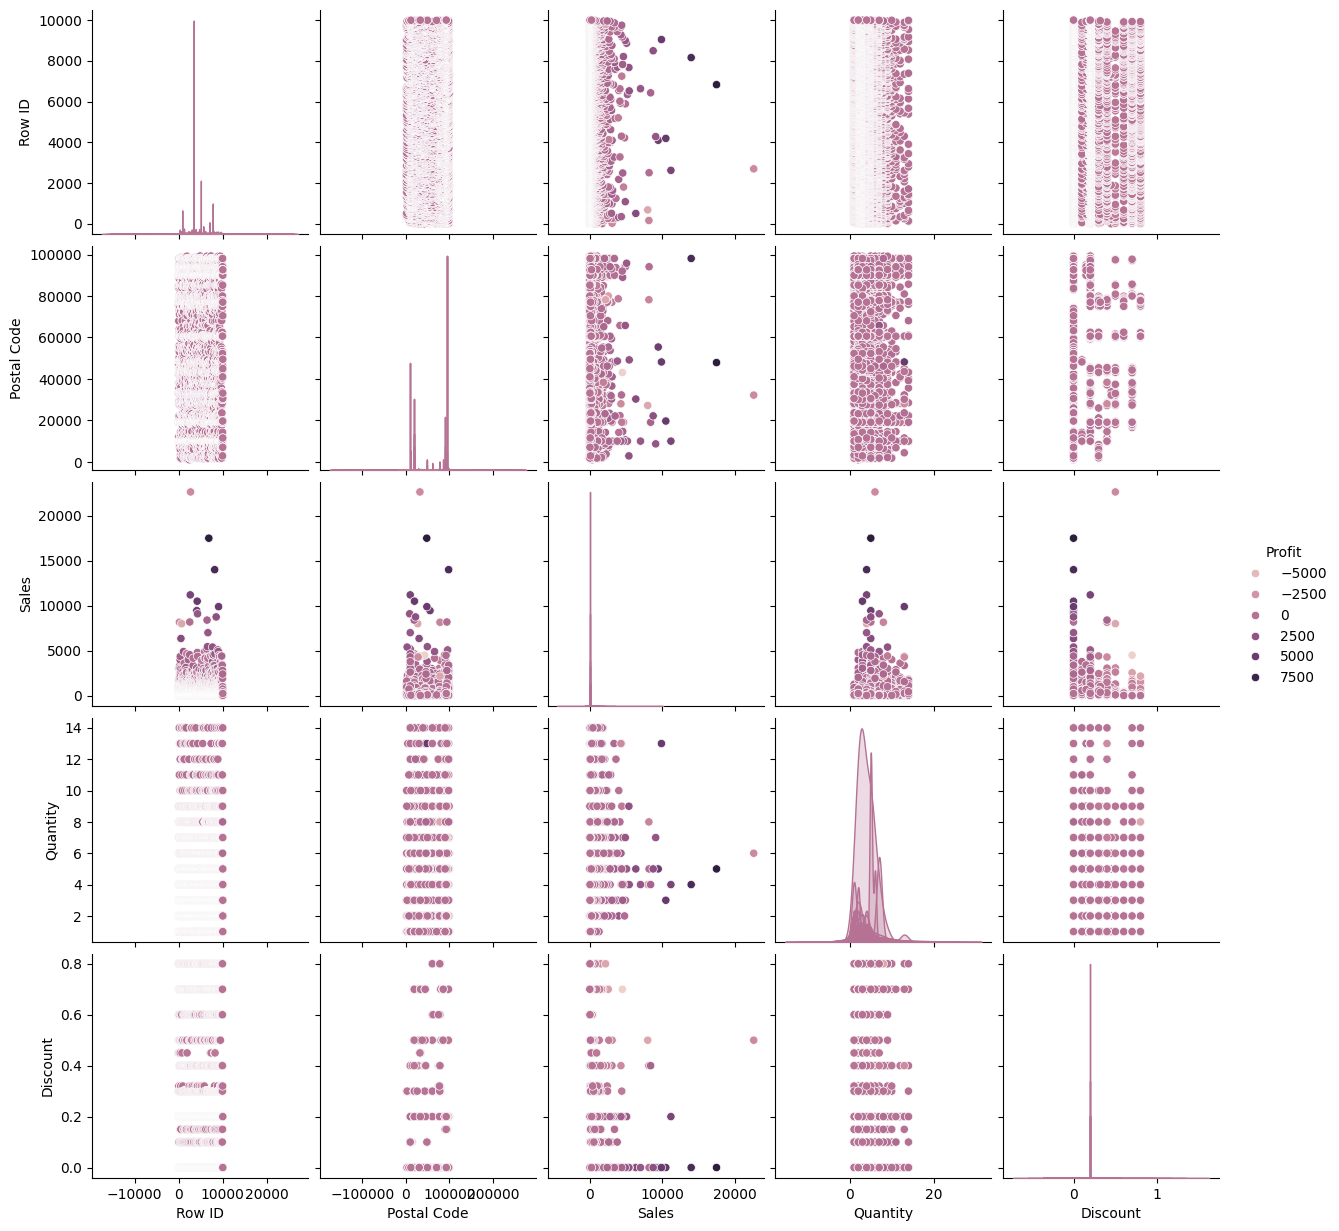

In [31]:
sns.pairplot(dataset1,hue='Profit')

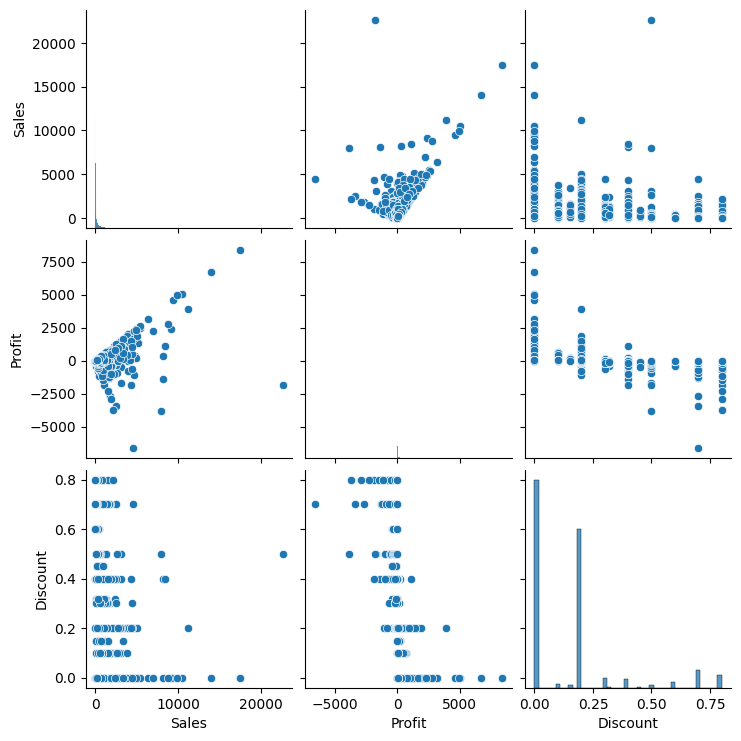

In [26]:
sns.pairplot(dataset1[['Sales', 'Profit', 'Discount']])
plt.show()

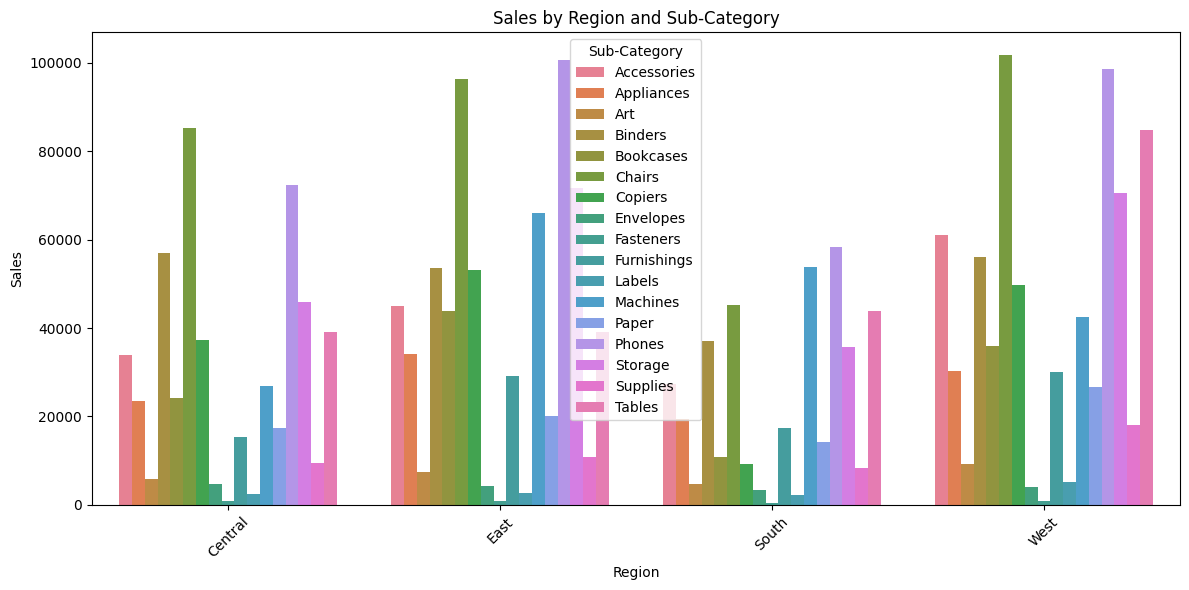

In [27]:
product_region_sales = dataset1.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(product_region_sales, x='Region', y='Sales', hue='Sub-Category')
plt.title('Sales by Region and Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
num_cols = dataset1.select_dtypes(include=['number'])
corr = num_cols.corr()
corr

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.011644,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.011644,1.000000,-0.022346,0.013376,0.057243,-0.028751
Sales,-0.001359,-0.022346,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.013376,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.057243,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.028751,0.479064,0.066253,-0.219487,1.000000


<Axes: >

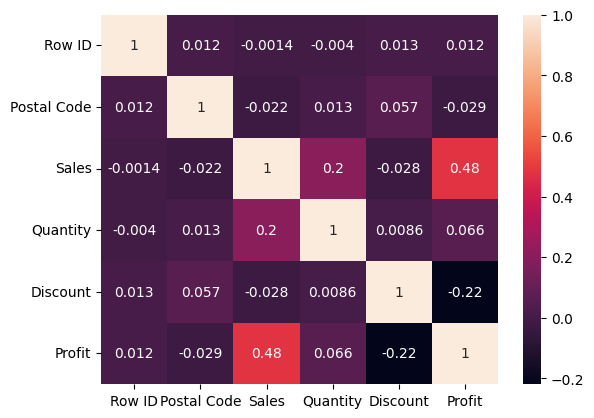

In [29]:
sns.heatmap(corr, annot=True)